# ISLR Chapter 9 Exercises

In [1]:
if(!require('ISLR')){
    install.packages('ISLR')
    library('ISLR')
}
if(!require('e1071')){
    install.packages('e1071')
    library('e1071')
}
if(!require('base')){
    install.packages('base')
    library('base')
}
if(!require('pROC')){
    install.packages('pROC')
    library('pROC')
}

Loading required package: ISLR

Loading required package: e1071

Loading required package: pROC

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




## 1.

Sketch the hyperplane 1 + 3X1 − X2 = 0. Indicate the set of points for which 1+3X1 −X2 > 0, as well as the set of points for which 1 + 3X1 − X2 < 0.

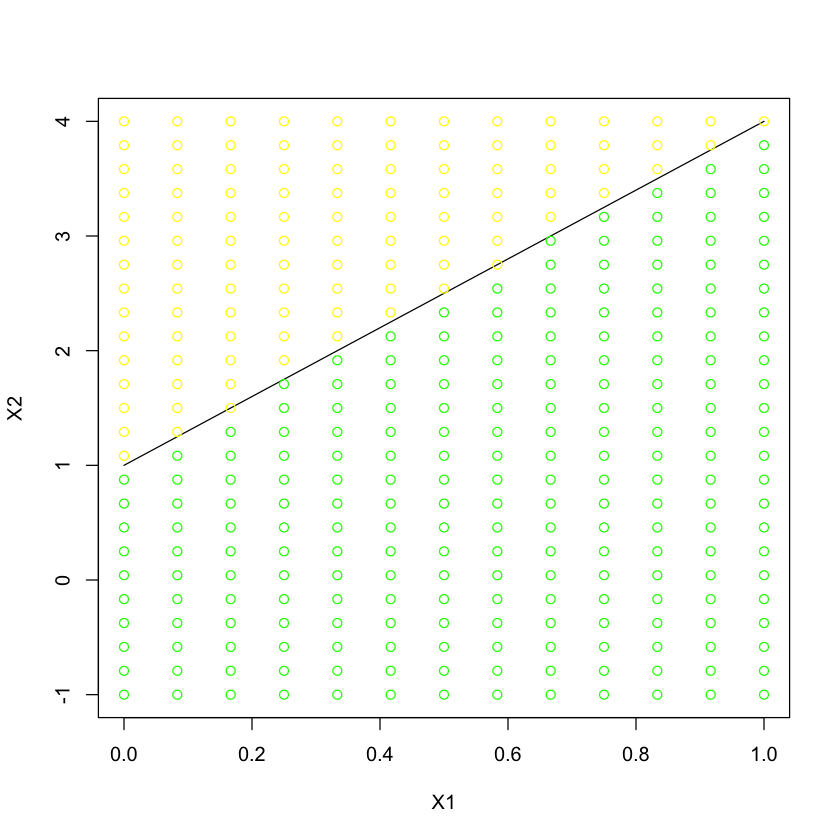

In [132]:
X1=seq(0,1,0.1)
plot(X1,1+3*X1,xlab='X1',ylab='X2',type='l',xlim=c(0,1),ylim=c(-1,4))

for(i in seq(-1,1,length.out = 25)){
  pts=data.frame(rep(i,25),seq(-1,4,length.out = 25))
  points(pts,col=ifelse(1+3*pts[,1]-pts[,2]>0,'green','yellow'))
}

The green area represents the points where 1 + 3X1 − X2 < 0, which are below the linear decision boundary. Yellow represents the oposite.

## 2.

We have seen that in p = 2 dimensions, a linear decision boundary takes the form β0 +β1X1 +β2X2 = 0. We now investigate a non-linear decision boundary.

### (a)

On your sketch, indicate the set of points for which (1+X1)2 +(2−X2)2 >4,
as well as the set of points for which (1+X1)2 +(2−X2)2 ≤4.

In [118]:
X1=seq(-3,3,0.1)

X2=2-sqrt(4-(1+X1)^2)

Warning message in sqrt(4 - (1 + X1)^2):
“NaNs produced”


Warning message in sqrt(4 - (1 + X1)^2):
“NaNs produced”


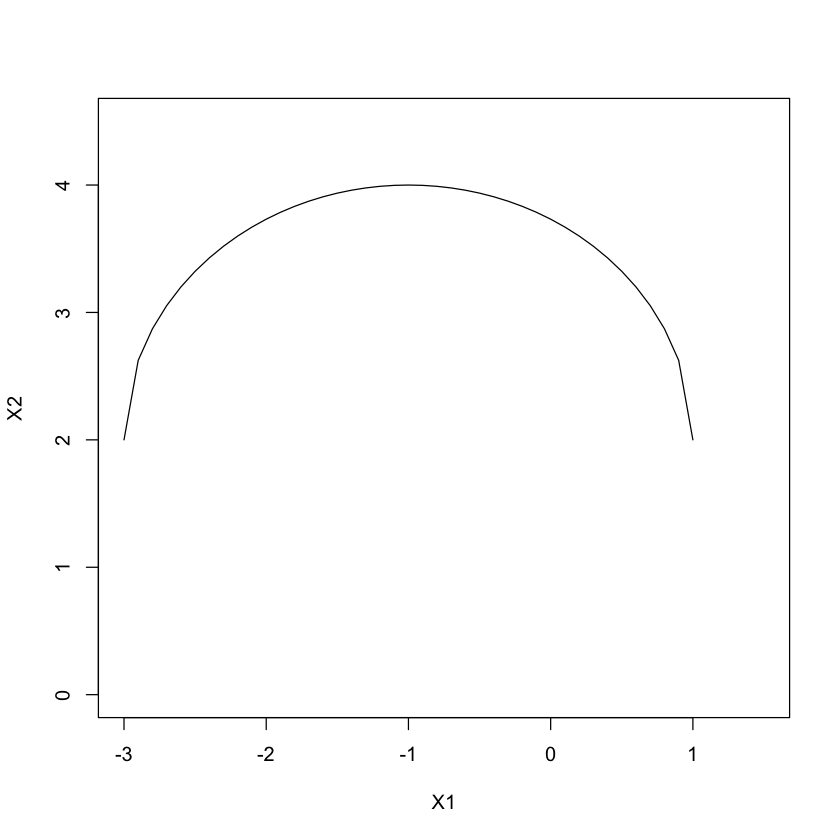

In [124]:
plot(X1,X2,type='l',xlim=c(-3,1.5),ylim=c(0,4.5))

X2=2+sqrt(4-(1+X1)^2)

## 4. 

Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation be- tween the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the train- ing data. Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

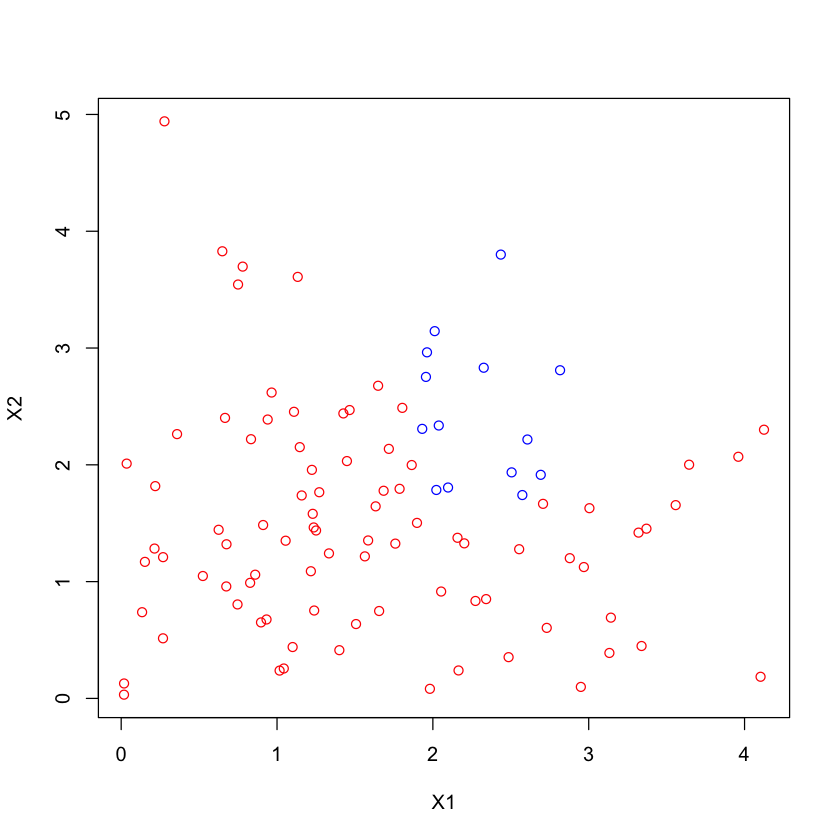

In [86]:
# generate data
set.seed(123)

X=data.frame(X1=abs(rnorm(100,1.5,1.2)),X2=abs(rnorm(100,1.5,1)+0.2))

pts=seq(0,5,length.out = 100)

# nonlinear decision boundary
classes=ifelse(2/3*(X[,1]-3)^6+X[,1]-1-X[2]>0,'red','blue')  

plot(X,xlab='X1',ylab='X2',col=classes)

In [87]:
svm_linear=svm(classes~.,data=data.frame(X,classes=as.factor(classes)),kernel='linear')
summary(svm_linear)


Call:
svm(formula = classes ~ ., data = data.frame(X, classes = as.factor(classes)), 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  30

 ( 16 14 )


Number of Classes:  2 

Levels: 
 blue red




In [88]:
svm_linear=predict(svm_linear,X,type='response')
table(classes,svm_linear)

       svm_linear
classes blue red
   blue    0  14
   red     0  86

In [89]:
missclassifcation_rate_linear = 14/86

In [90]:
missclassifcation_rate_linear

[1] 0.1627907

The missclassifcation rate of the `linear` SVM model is approximately `0.16%`

In [91]:
#fitting polynomial kernel
svm_poly=svm(classes ~.,data=data.frame(X,classes=as.factor(classes)),kernel='polynomial')

summary(svm_poly)


Call:
svm(formula = classes ~ ., data = data.frame(X, classes = as.factor(classes)), 
    kernel = "polynomial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  27

 ( 14 13 )


Number of Classes:  2 

Levels: 
 blue red




In [92]:
svm_poly = predict(svm_poly,X,type='response')
table(classes,svm_poly)

       svm_poly
classes blue red
   blue    5   9
   red     0  86

In [93]:
missclassifcation_rate_polynomial = 9/91

In [94]:
missclassifcation_rate_polynomial

[1] 0.0989011

The missclassifcation rate of the `polynomial` SVM model is approximately `0.10%`

In [77]:
#parameter tuning with polynomial SVM
set.seed(123)

svm_poly_tuned = tune(method=svm,y~.,data=data.frame(X,y=as.factor(classes)),
                   kernel="polynomial",ranges=list(cost=c(seq(0.05,1,length.out = 23),5,10,100)) )
svm_poly_tuned



Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.19 


In [97]:
svm_poly_tuned_preds = predict(svm_poly_tuned$best.model,X,type='response')
table(class,svm_poly_tuned_preds)

      svm_poly_tuned_preds
class  blue red
  blue   58   0
  red    19  23

## 7.

In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

In [36]:
data('Auto')

In [39]:
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


### (a)

Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [40]:
median_gas_mile = median(Auto$mpg)

In [41]:
#create binary var if obv > median mpg 1 else 0
Auto$above_med_mpg = ifelse(Auto$mpg > median_gas_mile, 1, 0)

In [43]:
table(Auto$above_med_mpg)


  0   1 
196 196 

There's a perfect 50/50 split

### (b)

Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with dif- ferent values of this parameter. Comment on your results.

In [46]:
costs = data.frame(cost=seq(1,50,length.out = 10))               #create range of cost values
svm_tuned = tune(svm,mpg ~ .,data=Auto,ranges=costs,kernel='linear')  # 10-fold cross validation.

svm_tuned


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 9.743744 


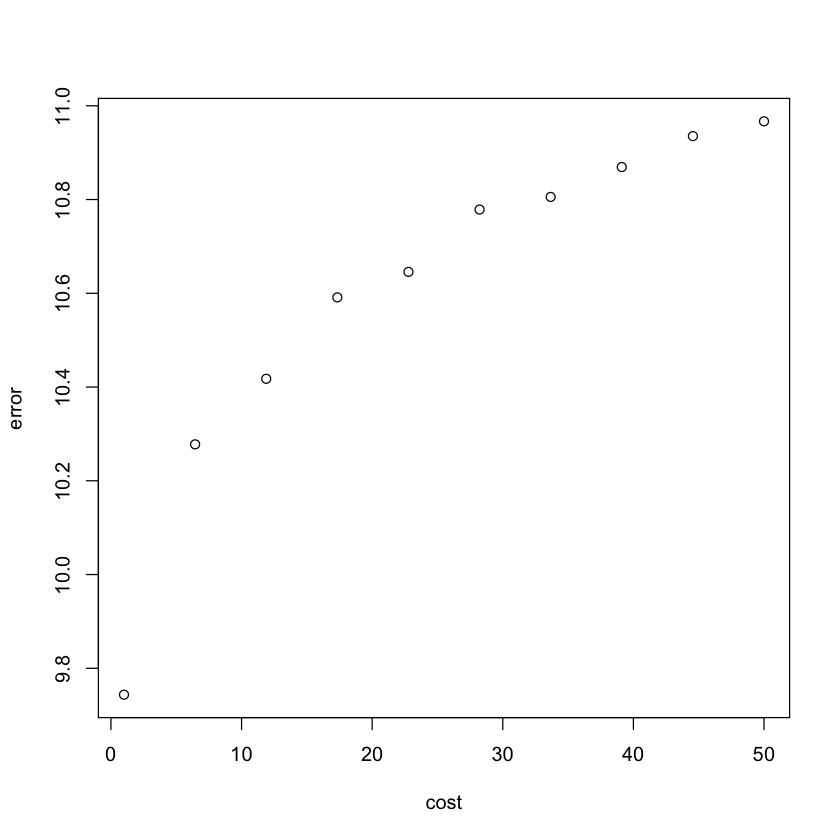

In [49]:
#visualize cv
plot(svm_tuned$performance[c(1,2)])

Cost increase almost monotonically with cost.

### (c)

Now repeat (b), this time using SVMs with radial and polyno- mial basis kernels, with different values of gamma and degree and cost. Comment on your results.

In [51]:
params_df=data.frame(cost=seq(1,50,length.out = 10),degree=seq(1,100,length.out = 5))

svm_poly = tune(svm,mpg~.,data=Auto,ranges=params_df,kernel='polynomial')

svm_poly


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
     cost degree
 28.22222      1

- best performance: 8.77135 


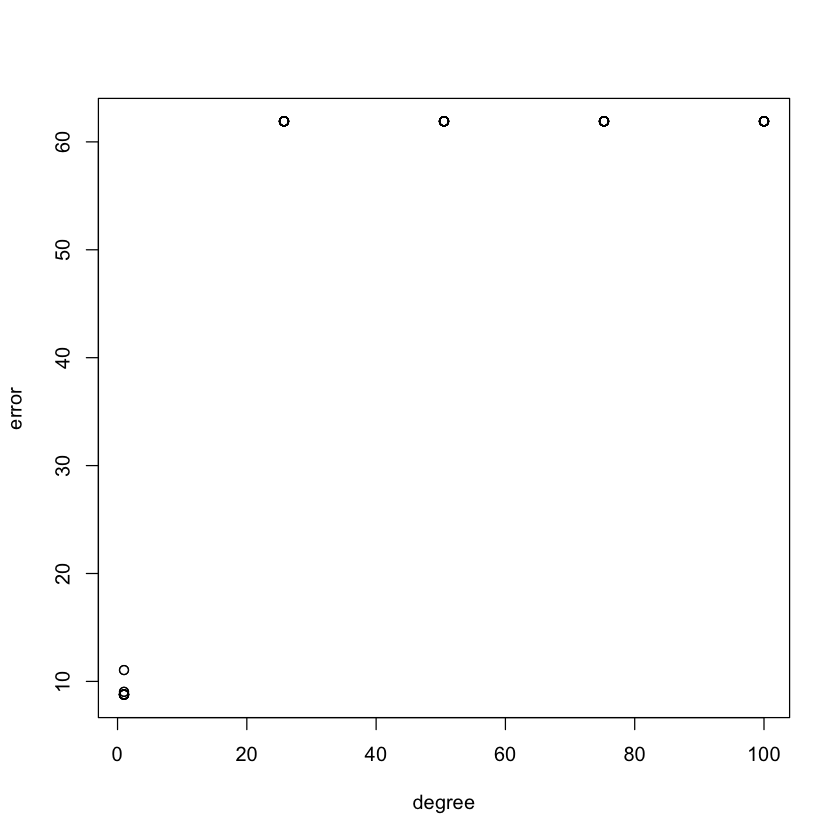

In [56]:
#visualize cv
plot(svm_poly$performance[c(2,3)])

In [52]:
params_df=data.frame(cost=seq(1,50,length.out = 10),gamma=seq(0.1,50,length.out = 1))

svm_rad=tune(svm,mpg~.,data=Auto,ranges=params_df,kernel='radial')

svm_rad


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
     cost gamma
 6.444444   0.1

- best performance: 6.332922 


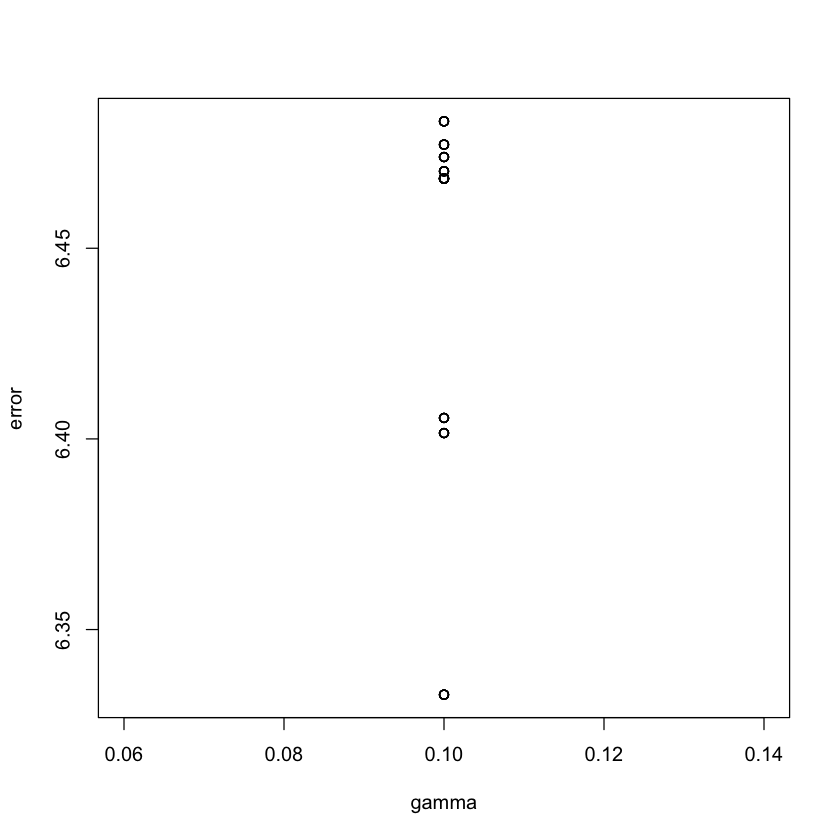

In [57]:
#visualize cv
plot(svm_rad$performance[c(2,3)])

We see performance improvements using both the `polynomial` and `radial` SVMs. It appears the values of both `degree` and `gamma` both yield the best error when they are very low. 

## 8.

This problem involves the OJ data set which is part of the ISLR package.

In [2]:
data('OJ')

### (a)

Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [3]:
head(OJ)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
6,CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


In [4]:
set.seed(123)
#get train index
train_ind = sample(nrow(OJ),800)

train_df = OJ[train_ind,]
test_df = OJ[-train_ind,]

### (b)

Fit a support vector classifier to the training data using cost=0.01, with Purchase as the response and the other variables as predictors. Use the summary() function to produce summary statistics, and describe the results obtained.

In [5]:
#fit SVM with purchase the DV
svm_model = svm(Purchase ~.,data=train_df, cost=0.01, kernel='linear')


#print summary
summary(svm_model)


Call:
svm(formula = Purchase ~ ., data = train_df, cost = 0.01, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  442

 ( 220 222 )


Number of Classes:  2 

Levels: 
 CH MM




This output indicates that the support vectors are almost equally split with respect to their classes. There are `442` observations acting as support vectors. 

### (c) 

What are the training and test error rates?

In [6]:
svm_model_trainpreds = predict(svm_model,newdata=train_df)

#compute confusion matrix
table(OJ[train_ind,"Purchase"],svm_model_trainpreds)

    svm_model_trainpreds
      CH  MM
  CH 426  61
  MM  71 242

In [7]:
mean(train_df$Purchase != svm_model_trainpreds)

[1] 0.165

In [8]:
svm_model_testpreds = predict(svm_model,newdata=test_df)

#compute confusion matrix
table(OJ[-train_ind,"Purchase"],svm_model_testpreds)

    svm_model_testpreds
      CH  MM
  CH 145  21
  MM  27  77

In [9]:
mean(test_df$Purchase != svm_model_testpreds)

[1] 0.1777778

We see that the train error rate is lower than the test error rate by just 0.07%. A lower test error rate is to be expected considering there's more training data.

### (d)

Use the tune() function to select an optimal cost. Consider val-
ues in the range 0.01 to 10.

In [11]:
svm_tuned=tune(svm,Purchase~.,data=train_df,ranges=data.frame(cost=seq(0.01,10,20)),kernel='linear')
summary(svm_tuned)


Error estimation of ‘svm’ using 10-fold cross validation: 0.1775


### (e)

Compute the training and test error rates using this new value
for cost.

In [17]:
svm_tuned_train_preds = predict(svm_tuned$best.model,train_df)

table(train_df$Purchase,svm_tuned_train_preds)

    svm_tuned_preds
      CH  MM
  CH 426  61
  MM  71 242

In [18]:
svm_tuned_test_preds = predict(svm_tuned$best.model,test_df)

table(test_df$Purchase,svm_tuned_test_preds)

    svm_tuned_test_preds
      CH  MM
  CH 145  21
  MM  27  77

### (f)

Repeat parts (b) through (e) using a support vector machine
with a radial kernel. Use the default value for `gamma`

In [21]:
svm_radial = svm(Purchase ~ .,data=train_df,cost=0.01,kernel='radial')
summary(svm_radial)


Call:
svm(formula = Purchase ~ ., data = train_df, cost = 0.01, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  0.01 

Number of Support Vectors:  629

 ( 313 316 )


Number of Classes:  2 

Levels: 
 CH MM




About 200 more support vectors here, with a realitively clean split of the classes.

In [23]:
svm_radia_train_preds = predict(svm_radial,train_df)

table(train_df$Purchase,svm_radia_train_preds)

    svm_radia_train_preds
      CH  MM
  CH 487   0
  MM 313   0

In [24]:
svm_radia_test_preds = predict(svm_radial,test_df)

table(test_df$Purchase,svm_radia_test_preds)

    svm_radia_test_preds
      CH  MM
  CH 166   0
  MM 104   0

### (g)

Repeat parts (b) through (e) using a support vector machine
with a polynomial kernel. Set `degree=2`.

In [25]:
svm_2deg_poly = svm(Purchase ~ .,data=train_df,cost=0.01,kernel='polynomial',degree=2) #second degree polynomial
summary(svm_2deg_poly)


Call:
svm(formula = Purchase ~ ., data = train_df, cost = 0.01, kernel = "polynomial", 
    degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  0.01 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  631

 ( 313 318 )


Number of Classes:  2 

Levels: 
 CH MM




In [26]:
#train
svm_2deg_poly_train_preds = predict(svm_2deg_poly,newdata=train_df)

#compute confusion matrix
table(OJ[train_ind,"Purchase"],svm_model_trainpreds)

    svm_model_trainpreds
      CH  MM
  CH 426  61
  MM  71 242

In [27]:
mean(train_df$Purchase != svm_2deg_poly_train_preds)

[1] 0.3725

In [29]:
#test
svm_2deg_poly_test_preds = predict(svm_2deg_poly,newdata=test_df)

#compute confusion matrix
table(OJ[-train_ind,"Purchase"],svm_2deg_poly_test_preds)

    svm_2deg_poly_test_preds
      CH  MM
  CH 165   1
  MM 100   4

In [31]:
mean(test_df$Purchase != svm_2deg_poly_test_preds)

[1] 0.3740741

In [32]:
#tuning 
svm_2deg_poly_tuned = tune(svm,Purchase ~ .,data=train_df,ranges=data.frame(cost=seq(0.01,10,20)),kernel='polynomial',degree=2)
summary(svm_2deg_poly_tuned)


Error estimation of ‘svm’ using 10-fold cross validation: 0.3875


In [33]:
svm_tuned_poly_train_preds = predict(svm_2deg_poly_tuned$best.model,train_df)

table(train_df$Purchase,svm_tuned_poly_train_preds)

    svm_tuned_poly_train_preds
      CH  MM
  CH 485   2
  MM 296  17

In [34]:
svm_tuned_poly_test_preds = predict(svm_2deg_poly_tuned$best.model,test_df)

table(test_df$Purchase,svm_tuned_poly_test_preds)

    svm_tuned_poly_test_preds
      CH  MM
  CH 165   1
  MM 100   4

### (h)

Overall, which approach seems to give the best results on this data?

The `linear` model worked best with a test error rate of `0.18`